# S&P 2019 Data Exploration Stage

**by Marc Angelo Acebedo**

# Table of Contents
- [Introduction](#introduction)
- [Data Setup & Overview](#setup)
- [Exploration](#explore)
    - [Univariate](#uni)
    - [Bivariate](#bi)
    - [Multivariate](#multi)


# I) Introduction <a id = "introduction"> </a>


- I kept features in separate CSVs because date formats differ. `eps_fc` and `eps_act` 

### After cleaning the original dataset as documented in my data wrangling process [here](TK) tk, I isolated the following columns:

`features.csv`
- **firm_id**

`avgs.csv`

## II) Data Setup & Overview<a id = "setup"></a> 

In [1]:
#import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
import calendar

%matplotlib inline
plt.style.use('bmh')

In [2]:
#define data directories
PATH_CLEAN = './data/clean/'
PATH_CLEAN_AVGS = './data/clean/averages/'

In [3]:
#define visuals destination
PATH_UNIVARIATE = './visuals/univariate/'
PATH_BIVARIATE = './visuals/bivariate'
PATH_MULTIVARIATE = './visuals/multivariate'

**Import features and all averages**

In [4]:
features = pd.read_csv(PATH_CLEAN + 'features.csv', low_memory = False)
avgs = pd.read_csv(PATH_CLEAN_AVGS + 'avgs.csv')

In [5]:
#import firm_ids for foreign key references
firm_ids = pd.read_csv(PATH_CLEAN + 'firms.csv')

### Describe Datasets

In [6]:
#look at 5 random entries
features.sample(5)

,firm_id,feature,date,term,value
99891,203,eps_fc,NaN,2003Q4,0.052
58289,198,eps_fc_terms,2007-01-01,2007Q2,0.242
165159,475,eps_act,NaN,2003Q4,0.960
94946,144,eps_fc,NaN,2006Q3,0.440
99921,203,eps_fc,NaN,2011Q2,0.496


In [7]:
avgs.sample(5)

,firm_id,average,average_type,time_period,feature
28507,227,NaN,yearly,2009,eod_act
34717,377,1.151500,yearly,2001,eps_fc_terms
46065,110,0.311619,quarterly,q1,eps_act
47430,465,0.505129,quarterly,q3,eps_act
18193,13,0.922500,yearly,2010,eps_act


In [8]:
print('FEATURES rows, columns = {}'.format(features.shape), '\n',
      'AVERAGES rows, columns = {}'.format(avgs.shape))

FEATURES rows, columns = (167660, 5) 
 AVERAGES rows, columns = (52015, 5)


### Convert DateTime columns

In [9]:
features.dtypes

firm_id      int64
feature     object
date        object
term        object
value      float64
dtype: object

In [10]:
features.date = pd.to_datetime(features.date)
features.term = pd.to_datetime(features.term).dt.to_period('Q')

In [11]:
#verify dtypes
features.dtypes

firm_id             int64
feature            object
date       datetime64[ns]
term        period[Q-DEC]
value             float64
dtype: object

In [12]:
avgs.dtypes

firm_id           int64
average         float64
average_type     object
time_period      object
feature          object
dtype: object

- kept **time_period** as an object bc column consists of varying DateTime formats

# III) Exploration <a id="explore"> </a>

## A) Univariate <a id = "uni"></a>

### MISSING VALUES (Features)

In [13]:
def generate_missing_total(df, title_name, save_path, csv_name):
    plt.figure(figsize = [10, 5])
    plt.title('Missing Values per Column under ' + title_name, size = 20)
    na_counts = df.isna().sum().sort_values(ascending = True)
    
    na_counts.plot.barh(x = na_counts.values, y = na_counts.index);
    plt.xlabel('Count', size = 10)
    plt.ylabel('Column Name', size = 10)
    plt.savefig(save_path + csv_name)

In [14]:
features.isna().any()

firm_id    False
feature    False
date        True
term       False
value       True
dtype: bool

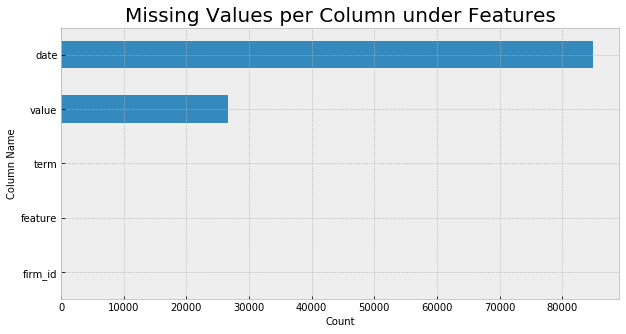

In [15]:
generate_missing_total(features, 'Features', PATH_UNIVARIATE, 'features-missing-total.png')

### MISSING VALUES (Averages)

In [16]:
avgs.isna().any()

firm_id         False
average          True
average_type    False
time_period      True
feature         False
dtype: bool

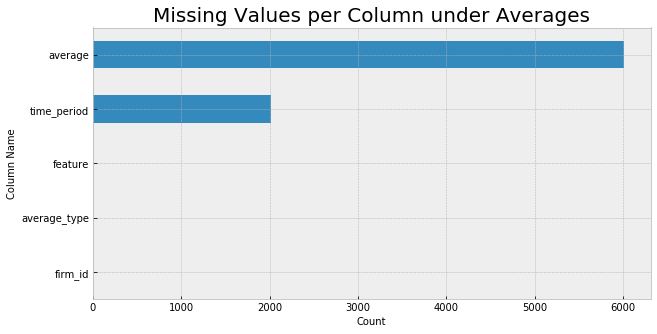

In [17]:
#averages
generate_missing_total(avgs, 'Averages', PATH_UNIVARIATE, 'avgs-missing-total.png')

### FIRM_ID (Features)

In [18]:
def generate_pct_bar(df, cat_var, color):
    cat_counts = df[cat_var].value_counts()
    ax = sb.countplot(data = df, y = cat_var, order = cat_counts.index, palette = color)
    
    n_points = df.shape[0]
    locs, labels = plt.yticks()
    
    for p in ax.patches:
        percentage = '{:0.1f}%'.format(100 * p.get_width()/n_points)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), size = 20)

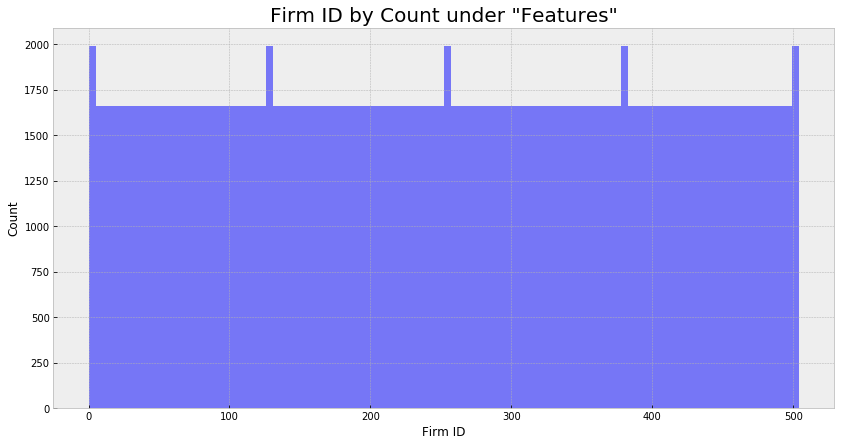

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize = [14,7])
x = features.firm_id.values
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, facecolor = 'blue', alpha = 0.5)
plt.xlabel('Firm ID')
plt.ylabel('Count')
plt.title('Firm ID by Count under "Features"', size = 20)
plt.show();

plt.savefig(PATH_UNIVARIATE + 'features-firm-id-count.png');

In [20]:
firm_counts = features.firm_id.value_counts()

In [21]:
firm_counts.sort_values()[-10:]

257    332
129    332
1      332
384    332
256    332
128    332
7      332
135    332
3      332
0      332
Name: firm_id, dtype: int64

In [22]:
firm_counts.sort_values()[:10]

383    332
126    332
381    332
253    332
125    332
380    332
252    332
124    332
379    332
251    332
Name: firm_id, dtype: int64

> I was going to generate bar charts showcasing the most common and least common FIRM IDs, but after looking at the value counts per firm id, I discovered that ***all firm id counts are consistent across the entire features.csv dataset.*** 

### FEATURE (Features)

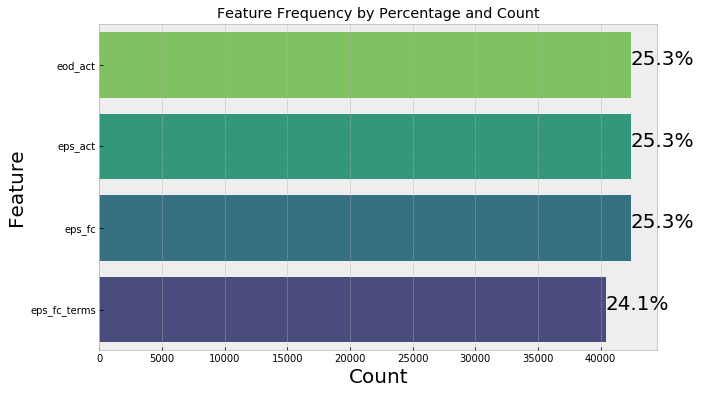

In [23]:
plt.figure(figsize = [10, 6])
generate_pct_bar(features, 'feature', 'viridis_r')
plt.title('Feature Frequency by Percentage and Count');
plt.xlabel('Count', size = 20)
plt.ylabel('Feature', size = 20)
plt.savefig(PATH_UNIVARIATE + 'features-feature-pct-count.png')

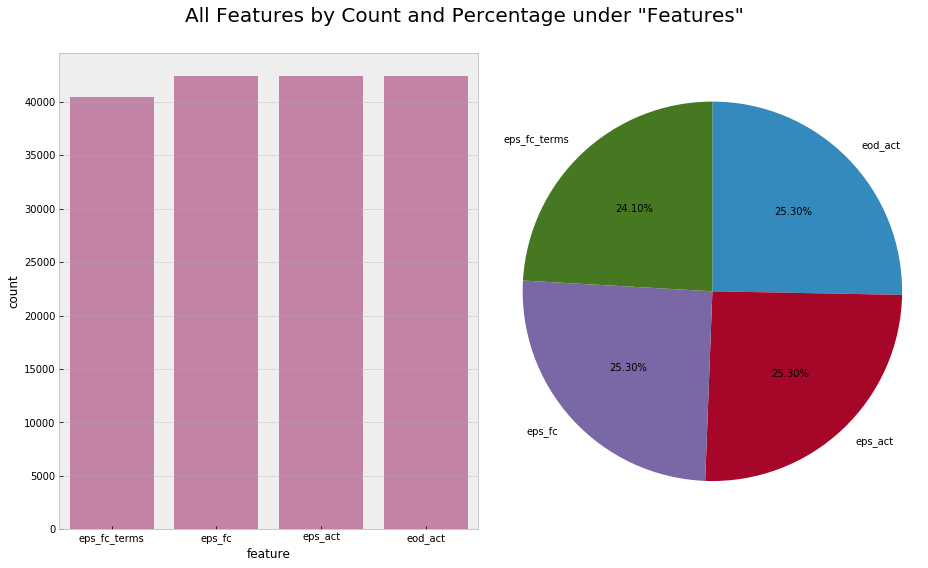

In [24]:
import itertools
plt.figure(figsize = [13, 8])

#set palette
base_color = sb.color_palette()[5]

#countplot
plt.subplot(1, 2, 1)
sb.countplot(data = features, x = 'feature', order = features.feature.value_counts(ascending = True).index,
            color = base_color)
frame = plt.gca()

#pie chart
plt.subplot(1, 2, 2)
sorted_counts = features['feature'].value_counts()
plt.pie(features.feature.value_counts(), startangle = 90, counterclock = False,
        autopct='%1.2f%%', labels = features.feature.value_counts().index);
plt.axis('square');

#overall graphic
plt.suptitle('All Features by Count and Percentage under "Features"', size = 20)
plt.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.savefig(PATH_UNIVARIATE + 'features-feature-pct-count.png')


### DATE (Features)

In [25]:
features_years = features.date.dt.year.dropna().astype(int)
features_months = features.date.dt.month.dropna().astype(int)

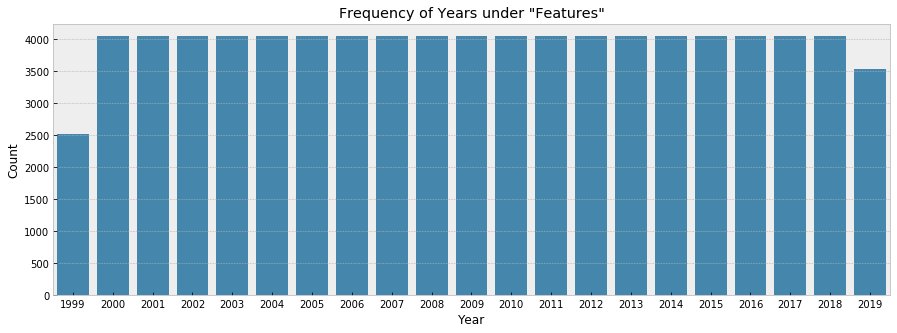

In [26]:
#years
plt.figure(figsize = [15, 5])
x = features_years
y = [i + random.gauss(0,1) for i, _ in enumerate(x)]

ax = sb.countplot(data = features, x = features_years, color = sb.color_palette()[0])
ax.set(xlabel = 'Year', ylabel = 'Count')
ax.set_title('Frequency of Years under "Features"')

plt.rcParams['axes.labelsize'] = 15
plt.savefig(PATH_UNIVARIATE + 'features-date-years-count.png')
plt.show()

In [27]:
#months
features_months = features_months.apply(lambda x: calendar.month_abbr[x])
months_order = ['Jan', 'Mar', 'Apr', 'Jun', 'Jul', 'Sep', 'Oct', 'Dec']

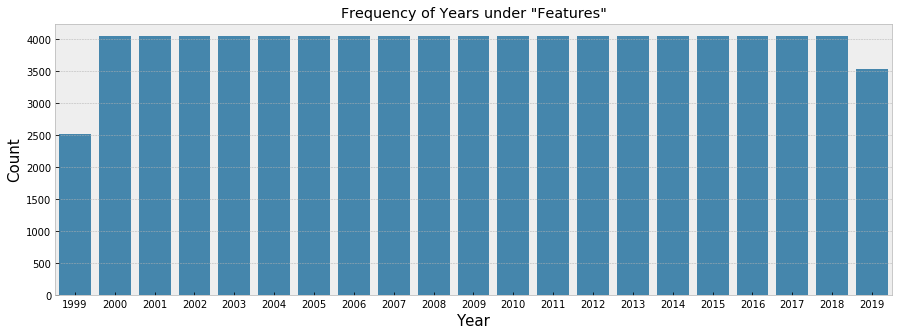

In [28]:
#years
plt.figure(figsize = [15, 5])

ax = sb.countplot(data = features, x = features_years, color = sb.color_palette()[0])
ax.set(xlabel = 'Year', ylabel = 'Count')
ax.set_title('Frequency of Years under "Features"')

plt.rcParams['axes.labelsize'] = 15
plt.savefig(PATH_UNIVARIATE + 'features-date-years-count.png')
plt.show()

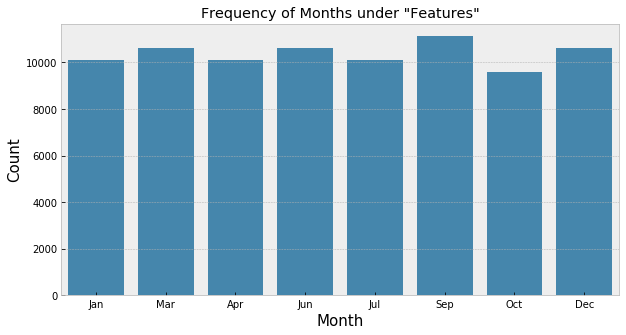

In [29]:
plt.figure(figsize = [10, 5])

ax = sb.countplot(data = features, x = features_months, color = sb.color_palette()[0], order = months_order)
ax.set(xlabel = 'Month', ylabel = 'Count')
ax.set_title('Frequency of Months under "Features"')

plt.rcParams['axes.labelsize'] = 15
plt.savefig(PATH_UNIVARIATE + 'features-date-months-count.png')
plt.show();

### TERM (Features)

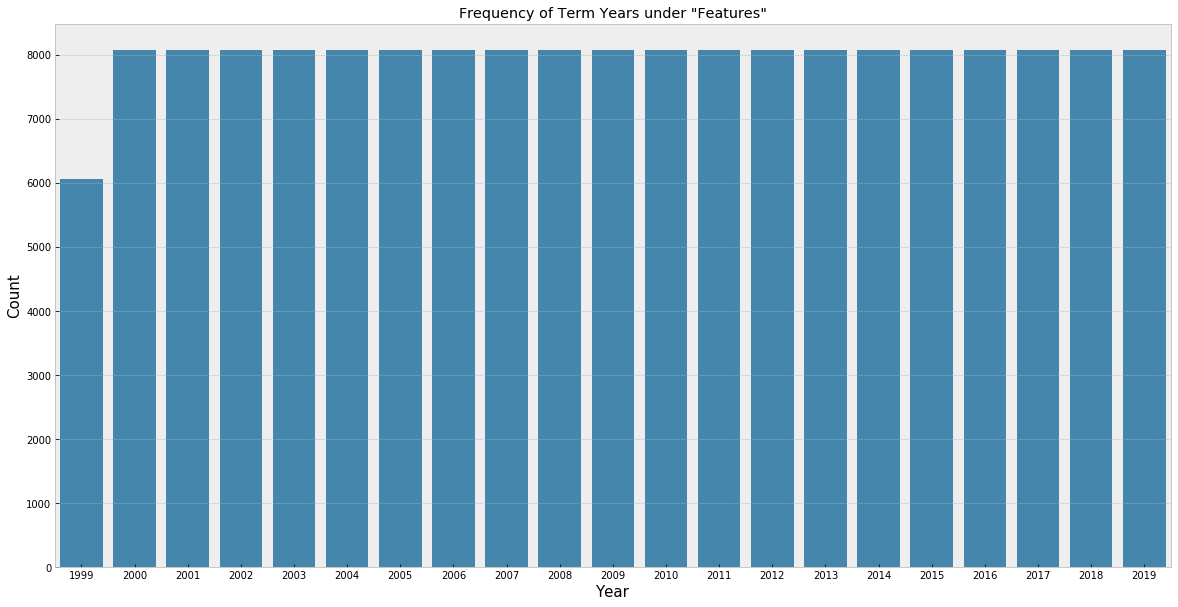

In [30]:
#years
plt.figure(figsize = [20, 10])

ax = sb.countplot(data = features, x = features.term.dt.year, color = sb.color_palette()[0])
ax.set(xlabel = 'Year', ylabel = 'Count')
ax.set_title('Frequency of Term Years under "Features"')

plt.rcParams['axes.labelsize'] = 15
plt.savefig(PATH_UNIVARIATE + 'features-term-years-count.png')
plt.show();

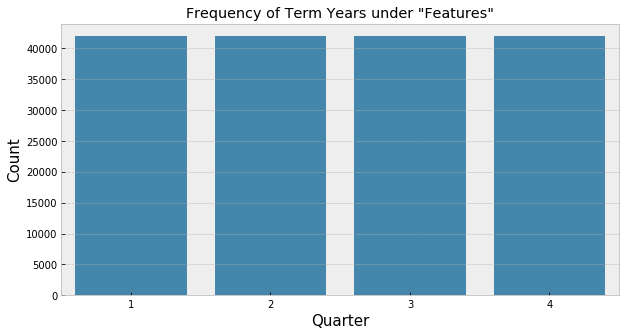

In [31]:
#quarter
#years
plt.figure(figsize = [10, 5])

ax = sb.countplot(data = features, x = features.term.dt.quarter, color = sb.color_palette()[0])
ax.set(xlabel = 'Quarter', ylabel = 'Count')
ax.set_title('Frequency of Term Years under "Features"')

plt.rcParams['axes.labelsize'] = 15
plt.savefig(PATH_UNIVARIATE + 'features-term-quarters-count.png')
plt.show();

**Observation 1:** There is a consistent number of ***quarters*** under **term**, unlike years.

**Observation 2:** For years, all counts are consistent except for the year 1999, whose count is significantly less than each other one, individually. TK this is because the year 1999 isn't included in the DataFrame TK.

### VALUE (Features)

In [32]:
def generate_hist(df, x, bins, title, xlabel, ylabel, save_path, csv_name):
    plt.figure(figsize = [14, 7])
    
    plt.hist(data = df, x = x, bins = bins, color = 'palevioletred')
    plt.title(title, size = 25)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.savefig(save_path + csv_name)

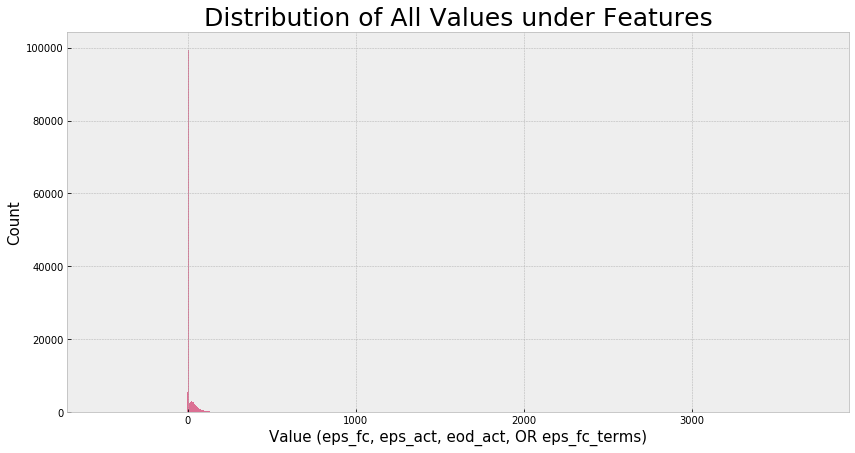

In [33]:
value_bins = np.arange(-505, features.value.max() + 5, 5)
generate_hist(features, 'value', value_bins, 'Distribution of All Values under Features', 
                'Value (eps_fc, eps_act, eod_act, OR eps_fc_terms)',
                'Count', PATH_UNIVARIATE, 'features-value-hist.png')

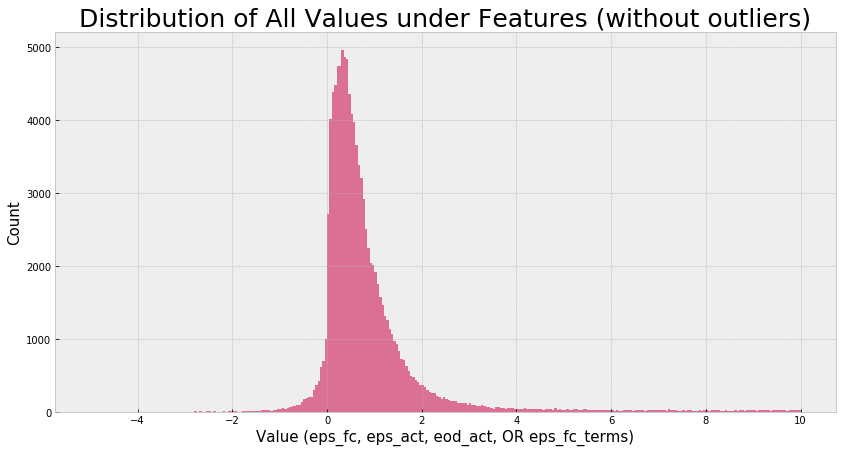

In [34]:
value_bins = np.arange(-5, 10 + 0.05, 0.05)
value_hist = generate_hist(features, 'value', value_bins, 'Distribution of All Values under Features (without outliers)', 
                'Value (eps_fc, eps_act, eod_act, OR eps_fc_terms)',
                'Count', PATH_UNIVARIATE, 'features-value-hist-zoom.png')

**Observation 1:** It appears to be a normal distribution with a ***heavy left skew.*** 

But just to make sure it is skewed heavily to the left, let's create a kernel density curve:


In [35]:
def generate_distplot(data, bins, ):
    fig = plt.figure(figsize = [14, 7])
    ax = sb.distplot(data, bins = bins, color = 'hotpink')
    ax.minorticks_on()
    return fig, ax

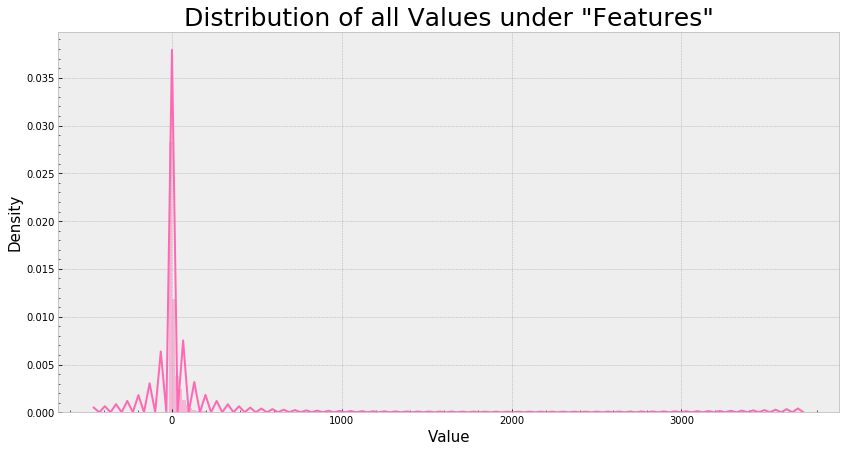

In [36]:
value_bins = np.arange(features.value.min(), features.value.max() + 20, 20)
generate_distplot(features.value.dropna(), bins = value_bins)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of all Values under "Features"', size = 25);
plt.savefig(PATH_UNIVARIATE + 'features-value-dist.png')

### FIRM_ID (Averages)

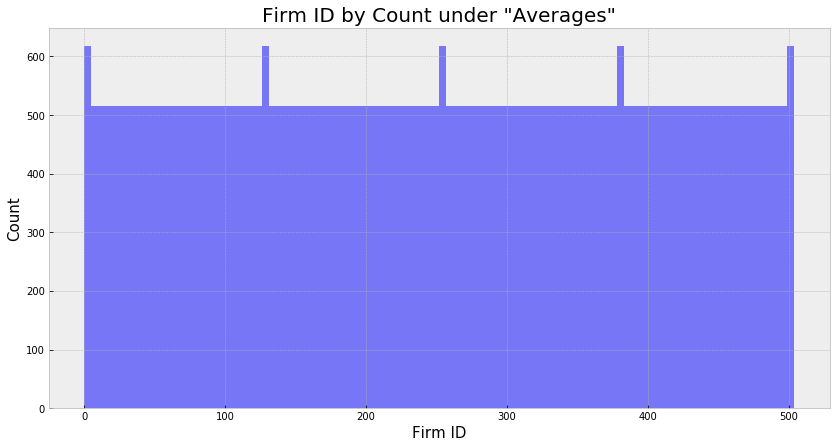

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(figsize = [14,7])
x = avgs.firm_id.values
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, facecolor = 'blue', alpha = 0.5)
plt.xlabel('Firm ID')
plt.ylabel('Count')
plt.title('Firm ID by Count under "Averages"', size = 20)
plt.show();

plt.savefig(PATH_UNIVARIATE + 'avgs-firm-id-count.png');

### AVERAGE (Averages)

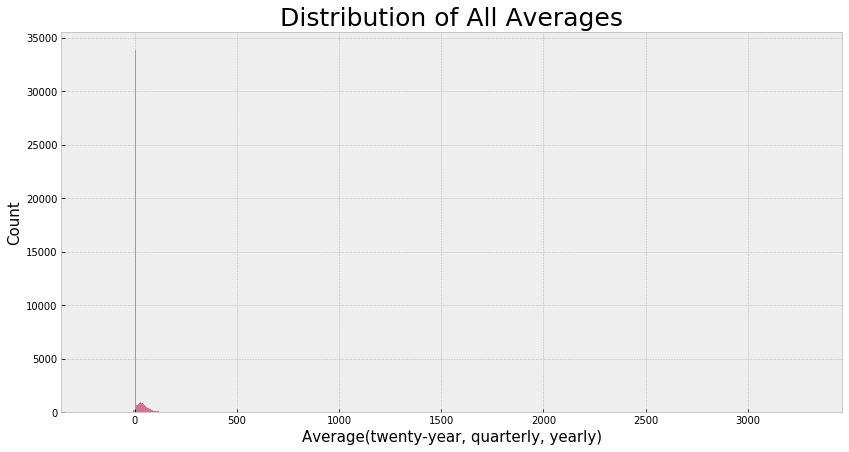

In [38]:
value_bins = np.arange(avgs.average.min(), avgs.average.max() + 5, 5)
generate_hist(avgs, 'average', value_bins, 'Distribution of All Averages', 
                'Average(twenty-year, quarterly, yearly)',
                'Count', PATH_UNIVARIATE, 'avgs-avg-hist.png')

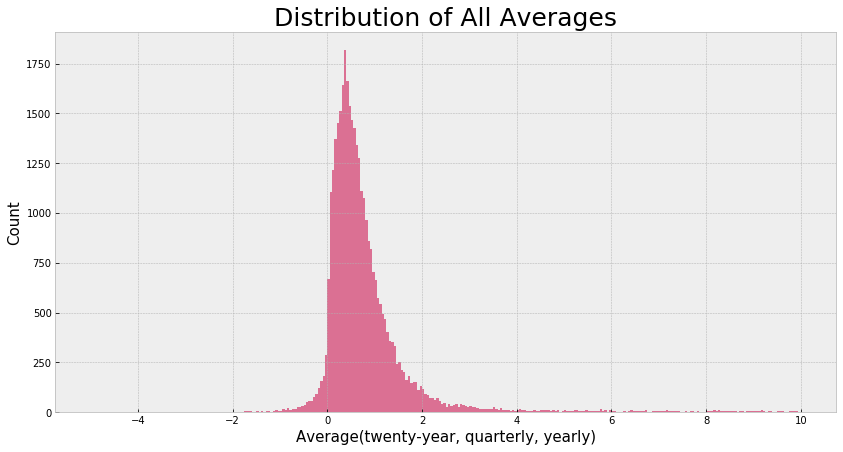

In [39]:
value_bins = np.arange(-5, 10 + 0.05, 0.05)
generate_hist(avgs, 'average', value_bins, 'Distribution of All Averages', 
                'Average(twenty-year, quarterly, yearly)',
                'Count', PATH_UNIVARIATE, 'avgs-avg-hist-zoom.png')

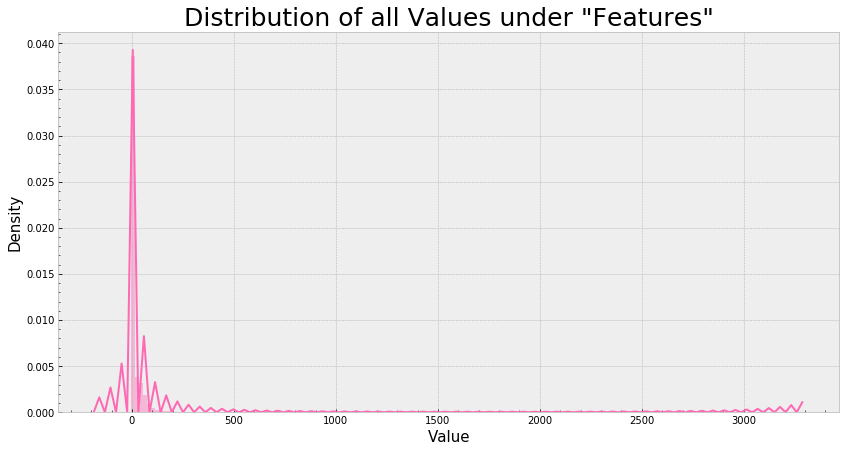

In [40]:
value_bins = np.arange(avgs.average.min(), avgs.average.max() + 20, 20)
generate_distplot(avgs.average.dropna(), bins = value_bins)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of all Values under "Features"', size = 25);
plt.savefig(PATH_UNIVARIATE + 'avgs-average-dist.png')

### AVERAGE TYPE (Averages)

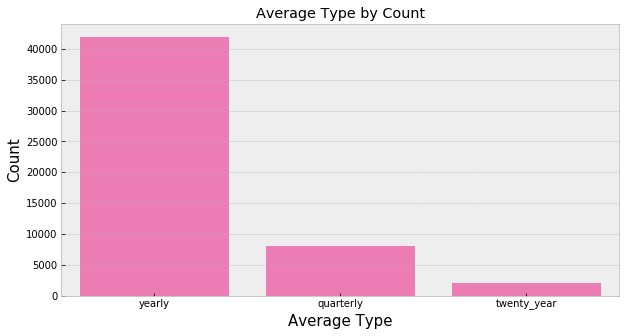

In [49]:
plt.figure(figsize = [10, 5])
cat_order = avgs.average_type.value_counts().index
sb.countplot(data = avgs, x = 'average_type', color = 'hotpink', order = cat_order)
plt.xlabel('Average Type')
plt.ylabel('Count')
plt.title('Average Type by Count')
plt.savefig(PATH_UNIVARIATE + 'avgs-avgtype-count.png')

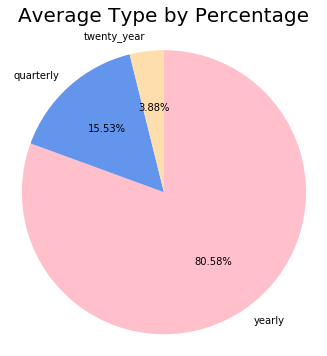

In [81]:
# import matplotlib.colors as mcolors
# colors = random.choices(list(mcolors.CSS4_COLORS.values()), k = 3)

# plt.figure(figsize = [10, 5])
# cs=cm.Set1(np.arange(40)/40.)

# plt.pie(avgs.average_type.value_counts(), startangle = 90, counterclock = False,
#         autopct='%1.2f%%', labels = avgs.average_type.value_counts().index, colors = colors);
# plt.suptitle('Average Type by Percentage', size = 20)
# plt.tight_layout()
# plt.subplots_adjust(top = 0.9)
# plt.axis('square');
# plt.savefig(PATH_UNIVARIATE + 'avgs-avgtype-pie.png')

### TIME_PERIOD (Averages)

In [ ]:
''

In [94]:
avgs.time_period.value_counts().sort_index().index

Index(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', 'q1', 'q2', 'q3', 'q4'],
      dtype='object')

Text(0.5, 1.0, 'Yearly & Quarterly Time Periods by Count')

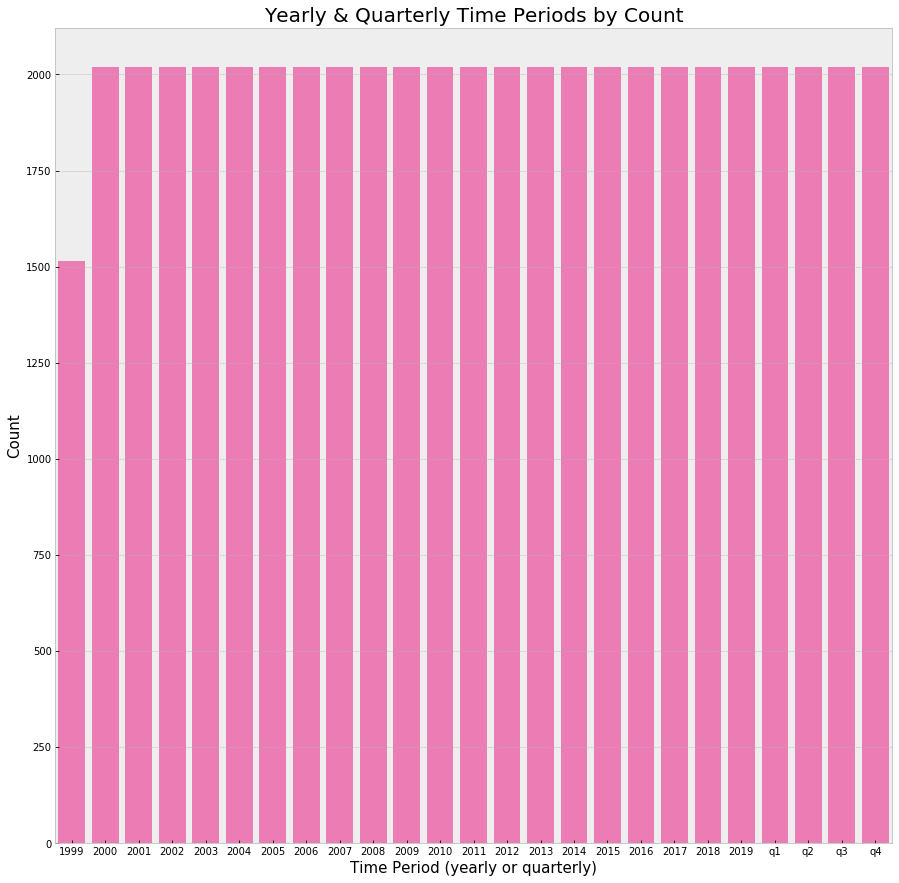

In [102]:
plt.figure(figsize = [15, 15])
cat_order = avgs.time_period.value_counts().sort_index().index
sb.countplot(data = avgs, x = 'time_period', color = 'hotpink', order = cat_order)
plt.xlabel('Time Period (yearly or quarterly)')
plt.ylabel('Count')
plt.title('Yearly & Quarterly Time Periods by Count', size = 20)

**.dropna() automatically takes off all NaN values - aka, twenty-year entries.**

### FEATURE (Averages)

## IV) Bivariate Exploration<a id = "bi"></a>

## V) Multivariate Exploration <a id="multi"></a>